In [1]:
import json
import numpy as np
import pandas as pd
import os

In [2]:
wd = "//wsl.localhost/ubuntu/home/gw240/projects/alibaba/clusterdata/cluster-trace-microservices-v2022/data/MSMetrics/"
df = pd.read_csv(wd+"MSMetrics_0.tar.gz", compression='gzip', header=0, sep=',', quotechar='"')

In [6]:
z = df.head(10)

,MSMetricsUpdate_0.csv,msname,msinstanceid,nodeid,cpu_utilization,memory_utilization
0,300000.0,MS_68185,MS_68185_POD_91,NODE_20236,0.172378,0.662361
1,420000.0,MS_25215,MS_25215_POD_372,NODE_36528,0.085708,0.432862
2,720000.0,MS_31285,MS_31285_POD_916,NODE_23966,0.445229,0.572093
3,780000.0,MS_42019,MS_42019_POD_38,NODE_34880,0.091057,0.529339
4,900000.0,MS_9482,MS_9482_POD_332,NODE_45529,0.177660,0.642626
5,900000.0,MS_35322,MS_35322_POD_870,NODE_14735,0.134958,0.734253
6,1020000.0,MS_11349,MS_11349_POD_3,NODE_8635,0.042087,0.427744
7,1080000.0,MS_42518,MS_42518_POD_50,NODE_4918,0.116525,0.858788
8,1320000.0,MS_47100,MS_47100_POD_73,NODE_4804,0.191792,0.666632
9,1440000.0,MS_42222,MS_42222_POD_893,NODE_38530,0.145036,0.416571


In [5]:
# Get total memory usage of the dataframe
total_memory = df.memory_usage(deep=True).sum()
print(total_memory)

3184164536


In [7]:
# Assuming df is your DataFrame
# Convert your timestamp column to a datetime type if it's not already
df['timestamp'] = pd.to_datetime(df['MSMetricsUpdate_0.csv'], unit='ms')

# Create a pivot table
cpu_timeseries = df.pivot_table(index=['msname', 'msinstanceid'],
                                columns='timestamp',
                                values='cpu_utilization')

# Optional: fill missing values if needed
cpu_timeseries.fillna(method='ffill', inplace=True)  # forward fill
# or
cpu_timeseries.fillna(0, inplace=True)  # fill with zero

C:\Users\Giles\AppData\Local\Temp\ipykernel_10464\164911135.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cpu_timeseries.fillna(method='ffill', inplace=True)  # forward fill


In [11]:
z = cpu_timeseries.head(100)
z

timestamp                1970-01-01 00:00:00  1970-01-01 00:01:00  \
msname   msinstanceid                                               
MS_10    MS_10_POD_0                0.039120             0.039660   
         MS_10_POD_1                0.020375             0.020625   
MS_100   MS_100_POD_0               0.064000             0.055708   
MS_10000 MS_10000_POD_0             0.016604             0.015333   
         MS_10000_POD_1             0.030854             0.028625   
...                                      ...                  ...   
MS_10016 MS_10016_POD_3             0.089483             0.088303   
         MS_10016_POD_4             0.084330             0.079470   
MS_10022 MS_10022_POD_0             0.075780             0.068940   
MS_10025 MS_10025_POD_0             0.112985             0.131127   
         MS_10025_POD_1             0.133537             0.121638   

timestamp                1970-01-01 00:02:00  1970-01-01 00:03:00  \
msname   msinstanceid                                               
MS_10    MS_10_POD_0                0.037140             0.037140   
         MS_10_POD_1                0.023417             0.023167   
MS_100   MS_100_POD_0               0.053708             0.065333   
MS_10000 MS_10000_POD_0             0.014854             0.018104   
         MS_10000_POD_1             0.028708             0.037417   
...                                      ...                  ...   
MS_10016 MS_10016_POD_3             0.089778             0.100202   
         MS_10016_POD_4             0.074250             0.074700   
MS_10022 MS_10022_POD_0             0.072180             0.067590   
MS_10025 MS_10025_POD_0             0.078716             0.075127   
         MS_10025_POD_1             0.086730             0.086386   

timestamp                1970-01-01 00:04:00  1970-01-01 00:05:00  \
msname   msinstanceid                                               
MS_10    MS_10_POD_0                0.037620             0.037260   
         MS_10_POD_1                0.024042             0.028125   
MS_100   MS_100_POD_0               0.062208             0.058292   
MS_10000 MS_10000_POD_0             0.018958             0.018125   
         MS_10000_POD_1             0.036521             0.034813   
...                                      ...                  ...   
MS_10016 MS_10016_POD_3             0.088795             0.087713   
         MS_10016_POD_4             0.076590             0.075510   
MS_10022 MS_10022_POD_0             0.072810             0.070380   
MS_10025 MS_10025_POD_0             0.081666             0.083436   
         MS_10025_POD_1             0.091106             0.093859   

timestamp                1970-01-01 00:06:00  1970-01-01 00:07:00  \
msname   msinstanceid                                               
MS_10    MS_10_POD_0                0.036060             0.036120   
         MS_10_POD_1                0.023250             0.020375   
MS_100   MS_100_POD_0               0.061917             0.063833   
MS_10000 MS_10000_POD_0             0.014625             0.014854   
         MS_10000_POD_1             0.029062             0.029083   
...                                      ...                  ...   
MS_10016 MS_10016_POD_3             0.097153             0.087812   
         MS_10016_POD_4             0.087750             0.073620   
MS_10022 MS_10022_POD_0             0.068490             0.067410   
MS_10025 MS_10025_POD_0             0.076798             0.140961   
         MS_10025_POD_1             0.097743             0.085108   

timestamp                1970-01-01 00:08:00  1970-01-01 00:09:00  ...  \
msname   msinstanceid                                              ...   
MS_10    MS_10_POD_0                0.040320             0.045900  ...   
         MS_10_POD_1                0.019625             0.020458  ...   
MS_100   MS_100_POD_0               0.060125             0.057333  ...   
MS_10000 MS_10000_POD_0             0.

In [10]:
# Get total memory usage of the dataframe
total_memory = cpu_timeseries.memory_usage(deep=True).sum()
print(total_memory)

150545836


In [13]:
from tqdm import trange
# Define the working directory
wd = "//wsl.localhost/ubuntu/home/gw240/projects/alibaba/clusterdata/cluster-trace-microservices-v2022/data/MSMetrics/"

# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()

# Loop through the first 10 minutes of data
for i in trange(10):
    file_name = f"MSMetrics_{i}.tar.gz"
    file_path = os.path.join(wd, file_name)
    
    # Read the data from the tar.gz file
    df = pd.read_csv(file_path, compression='gzip', header=0, sep=',', quotechar='"')
    
    # Assuming the first column is the timestamp column
    df['timestamp'] = pd.to_datetime(df.iloc[:, 0], unit='ms')
    
    # Append the data to the all_data DataFrame
    all_data = pd.concat([all_data, df])

# Now create the pivot table for cpu_timeseries
cpu_timeseries = all_data.pivot_table(index=['msname', 'msinstanceid'],
                                      columns='timestamp',
                                      values='cpu_utilization')

# Fill missing values if necessary
cpu_timeseries.fillna(method='ffill', inplace=True)  # forward fill
# or
cpu_timeseries.fillna(0, inplace=True)  # fill with zero

100%|██████████| 10/10 [06:19<00:00, 37.93s/it]
C:\Users\Giles\AppData\Local\Temp\ipykernel_10464\3406541299.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cpu_timeseries.fillna(method='ffill', inplace=True)  # forward fill


In [44]:
z = cpu_timeseries.head(10)
z

timestamp                 1970-01-01 00:00:00  1970-01-01 00:01:00  \
msname   msinstanceid                                                
MS_10    MS_10_POD_0                 0.039120             0.039660   
         MS_10_POD_1                 0.020375             0.020625   
MS_100   MS_100_POD_0                0.064000             0.055708   
MS_10000 MS_10000_POD_0              0.016604             0.015333   
         MS_10000_POD_1              0.030854             0.028625   
         MS_10000_POD_10             0.024396             0.022708   
         MS_10000_POD_11             0.025708             0.026792   
         MS_10000_POD_12             0.026229             0.026000   
         MS_10000_POD_14             0.023313             0.023500   
         MS_10000_POD_15             0.023187             0.026979   

timestamp                 1970-01-01 00:02:00  1970-01-01 00:03:00  \
msname   msinstanceid                                                
MS_10    MS_10_POD_0                 0.037140             0.037140   
         MS_10_POD_1                 0.023417             0.023167   
MS_100   MS_100_POD_0                0.053708             0.065333   
MS_10000 MS_10000_POD_0              0.014854             0.018104   
         MS_10000_POD_1              0.028708             0.037417   
         MS_10000_POD_10             0.021917             0.027125   
         MS_10000_POD_11             0.028229             0.033292   
         MS_10000_POD_12             0.025458             0.029292   
         MS_10000_POD_14             0.023542             0.031938   
         MS_10000_POD_15             0.027000             0.026750   

timestamp                 1970-01-01 00:04:00  1970-01-01 00:05:00  \
msname   msinstanceid                                                
MS_10    MS_10_POD_0                 0.037620             0.037260   
         MS_10_POD_1                 0.024042             0.028125   
MS_100   MS_100_POD_0                0.062208             0.058292   
MS_10000 MS_10000_POD_0              0.018958             0.018125   
         MS_10000_POD_1              0.036521             0.034813   
         MS_10000_POD_10             0.025563             0.025292   
         MS_10000_POD_11             0.032333             0.030833   
         MS_10000_POD_12             0.030083             0.027646   
         MS_10000_POD_14             0.033500             0.033146   
         MS_10000_POD_15             0.030771             0.029313   

timestamp                 1970-01-01 00:06:00  1970-01-01 00:07:00  \
msname   msinstanceid                                                
MS_10    MS_10_POD_0                 0.036060             0.036120   
         MS_10_POD_1                 0.023250             0.020375   
MS_100   MS_100_POD_0                0.061917             0.063833   
MS_10000 MS_10000_POD_0              0.014625             0.014854   
         MS_10000_POD_1              0.029062             0.029083   
         MS_10000_POD_10             0.021708             0.021604   
         MS_10000_POD_11             0.024771             0.024021   
         MS_10000_POD_12             0.022042             0.025000   
         MS_10000_POD_14             0.034604             0.033750   
         MS_10000_POD_15             0.023125             0.024833   

timestamp                 1970-01-01 00:08:00  1970-01-01 00:09:00  ...  \
msname   msinstanceid                                               ...   
MS_10    MS_10_POD_0                 0.040320             0.045900  ...   
         MS_10_POD_1                 0.019625             0.020458  ...   
MS_100   MS_100_POD_0                0.060125             0.057333  ...   
MS_10000 MS_10000_POD_0              0.014354             0.014188  ...   
         MS_10000_POD_1              0.030354             0.031521  ...   
         MS_10000_POD_10             0.021250             0.020792  ...   
         MS_10000_POD_11            

In [36]:
z.loc["MS_10"]

timestamp,1970-01-01 00:00:00,1970-01-01 00:01:00,1970-01-01 00:02:00,1970-01-01 00:03:00,1970-01-01 00:04:00,1970-01-01 00:05:00,1970-01-01 00:06:00,1970-01-01 00:07:00,1970-01-01 00:08:00,1970-01-01 00:09:00,...,1970-01-01 04:50:00,1970-01-01 04:51:00,1970-01-01 04:52:00,1970-01-01 04:53:00,1970-01-01 04:54:00,1970-01-01 04:55:00,1970-01-01 04:56:00,1970-01-01 04:57:00,1970-01-01 04:58:00,1970-01-01 04:59:00
msinstanceid,,,,,,,,,,,,,,,,,,,,,
MS_10_POD_0,0.039120,0.039660,0.037140,0.037140,0.037620,0.037260,0.03606,0.036120,0.040320,0.045900,...,0.04524,0.04068,0.040800,0.040740,0.040620,0.040440,0.038880,0.039180,0.039240,0.038460
MS_10_POD_1,0.020375,0.020625,0.023417,0.023167,0.024042,0.028125,0.02325,0.020375,0.019625,0.020458,...,0.02100,0.02075,0.021125,0.020292,0.020333,0.023542,0.020083,0.019542,0.020292,0.020375


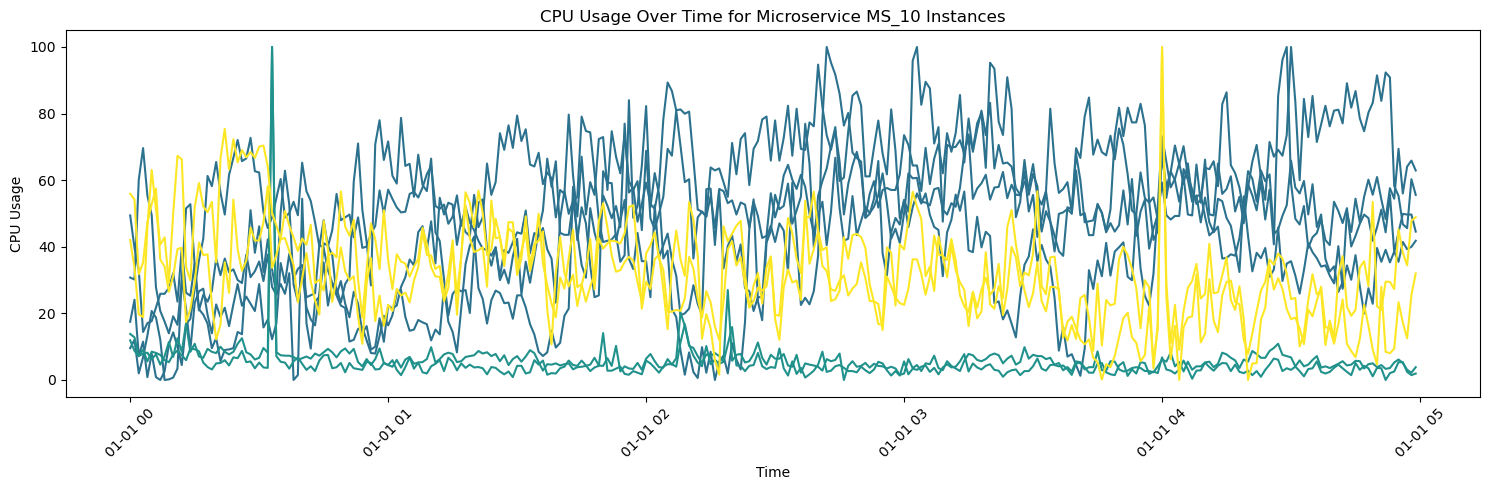

In [92]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

ms_list=['MS_71990', 'MS_19585', 'USER', 'MS_2852', 'MS_6263', 'MS_27421', 'UNKNOWN', 'MS_34532', 'MS_33598']
colors = cm.viridis(np.linspace(0, 1, len(ms_list)))
# Plot the CPU usage over time for each instance
plt.figure(figsize=(15, 5))  # Set the figure size as needed
ind=0
for ms in ms_list:
    # Filter the DataFrame to only include rows for the microservice "MS_10"
    ms_data = cpu_timeseries.loc[cpu_timeseries.index.get_level_values('msname') == ms]
    ms_normalized = (ms_data - ms_data.min(axis=1).values[:, np.newaxis]) / \
                   (ms_data.max(axis=1) - ms_data.min(axis=1)).values[:, np.newaxis] * 100
    # Iterate over each instance and plot
    for instance in ms_data.index.get_level_values('msinstanceid').unique():
        instance_data = ms_normalized.xs(instance, level='msinstanceid')  # Select data for the instance
        plt.plot(ms_normalized.columns, instance_data.iloc[0], label=instance,color=colors[ind])
    ind+=1
# plt.legend(title='Instance ID')
plt.title('CPU Usage Over Time for Microservice MS_10 Instances')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

          MS_71990  MS_19585  USER   MS_2852   MS_6263  MS_27421  UNKNOWN  \
MS_71990       NaN       NaN   NaN       NaN       NaN       NaN      NaN   
MS_19585       NaN       NaN   NaN       NaN       NaN       NaN      NaN   
USER           NaN       NaN   NaN       NaN       NaN       NaN      NaN   
MS_2852        NaN       NaN   NaN  1.000000 -0.232375       NaN      NaN   
MS_6263        NaN       NaN   NaN -0.232375  1.000000       NaN      NaN   
MS_27421       NaN       NaN   NaN       NaN       NaN       NaN      NaN   
UNKNOWN        NaN       NaN   NaN       NaN       NaN       NaN      NaN   
MS_34532       NaN       NaN   NaN       NaN       NaN       NaN      NaN   
MS_33598       NaN       NaN   NaN -0.280702  0.154545       NaN      NaN   

          MS_34532  MS_33598  
MS_71990       NaN       NaN  
MS_19585       NaN       NaN  
USER           NaN       NaN  
MS_2852        NaN -0.280702  
MS_6263        NaN  0.154545  
MS_27421       NaN       NaN  
UNKNOWN     

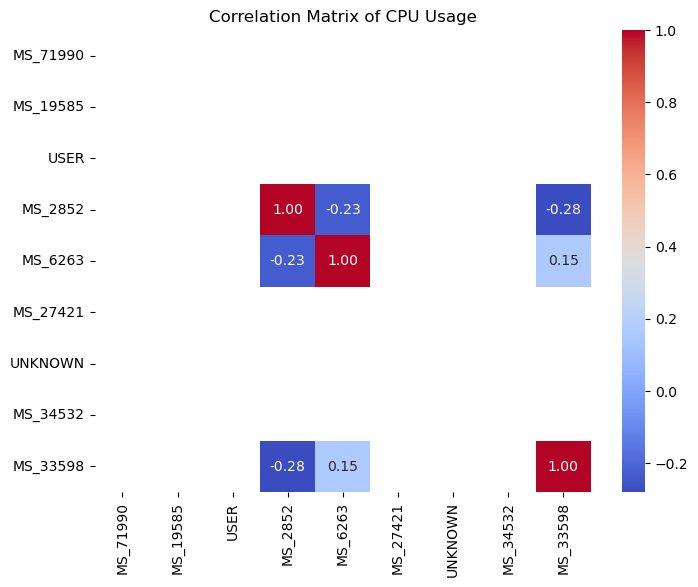

In [93]:
import pandas as pd

# Initialize a DataFrame to store normalized CPU usage for each microservice
combined_normalized_data = pd.DataFrame(index=cpu_timeseries.columns)

# Normalize and combine data for each microservice
for ms in ms_list:
    ms_data = cpu_timeseries.loc[cpu_timeseries.index.get_level_values('msname') == ms]
    ms_normalized = (ms_data - ms_data.min(axis=1).values[:, np.newaxis]) / \
                    (ms_data.max(axis=1) - ms_data.min(axis=1)).values[:, np.newaxis] * 100
    # Ensure there are no divisions by zero
    ms_normalized.fillna(0, inplace=True)  # in case there are rows with no variation
    
    # Take the mean CPU usage for the microservice if there are multiple instances
    combined_normalized_data[ms] = ms_normalized.mean(axis=0)

# Now that we have a DataFrame with each microservice's normalized usage as columns, we can calculate the correlation
# combined_normalized_data = combined_normalized_data.diff()
correlation_matrix = combined_normalized_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# If you want to visualize the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of CPU Usage')
plt.show()

C:\Users\Giles\AppData\Local\Temp\ipykernel_10464\3530730609.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


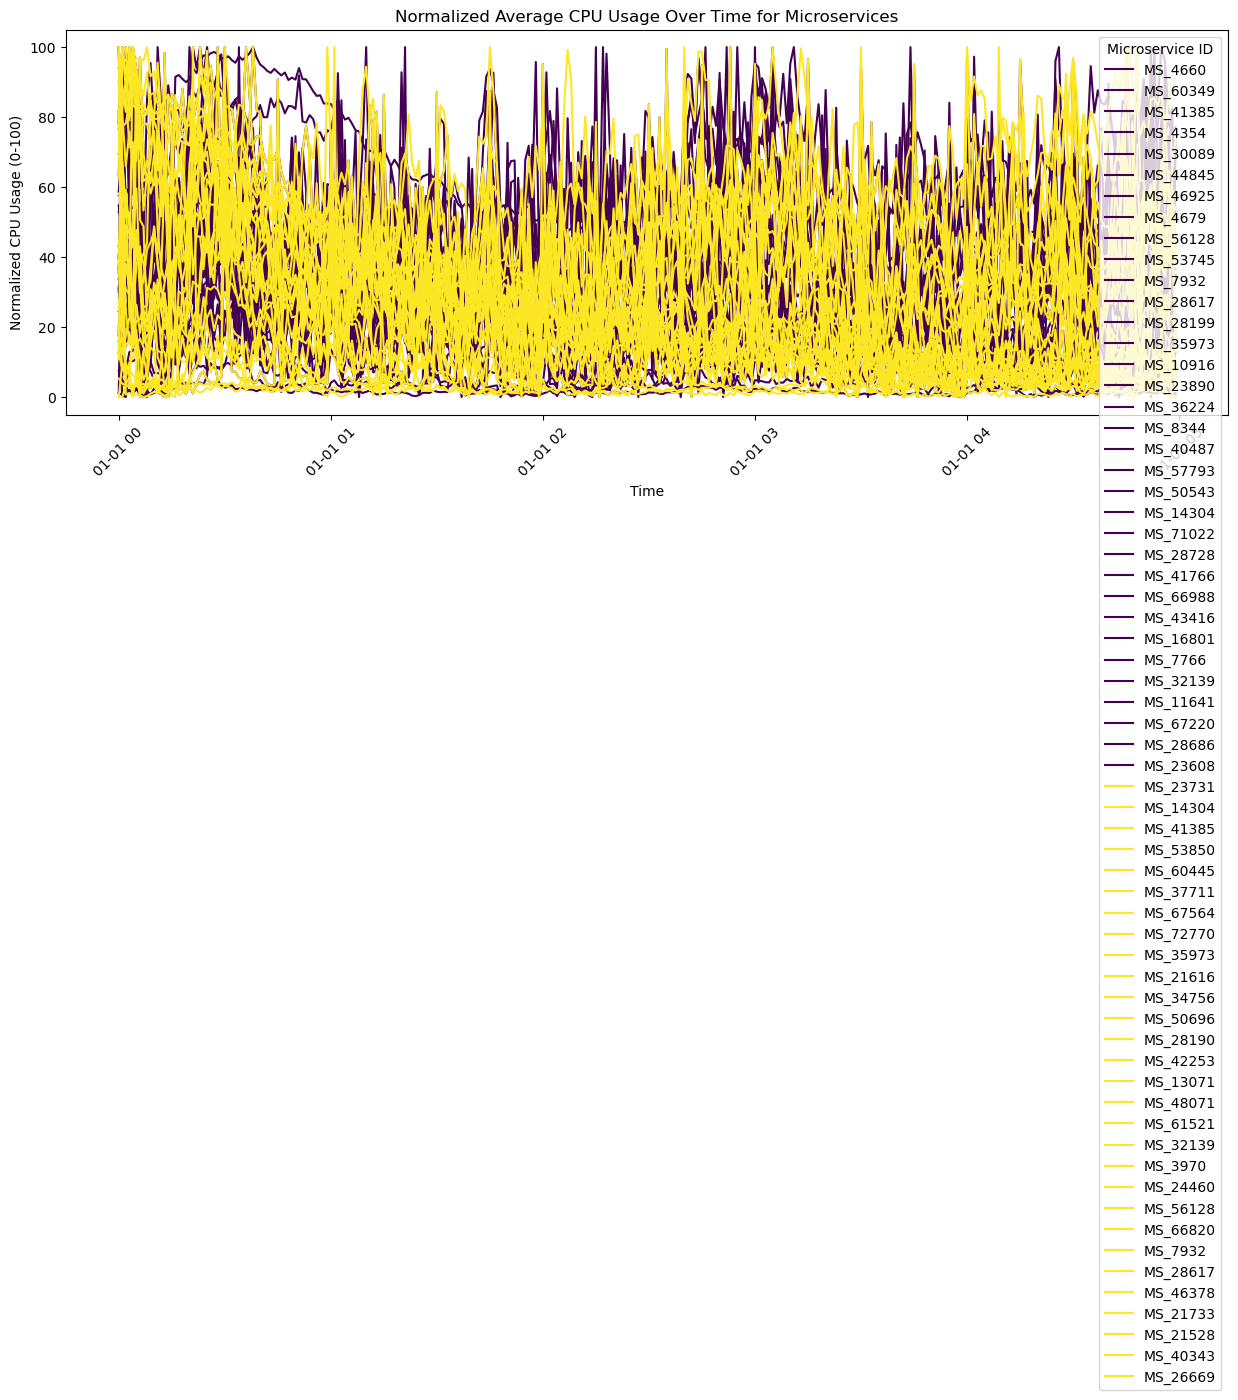

           MS_4660  MS_60349  MS_41385   MS_4354  MS_30089  MS_44845  \
MS_4660   1.000000  0.207290  0.361637  0.111454  0.128687  0.058712   
MS_60349  0.207290  1.000000  0.414694  0.400549  0.137167 -0.169087   
MS_41385  0.361637  0.414694  1.000000  0.518121  0.152796 -0.415405   
MS_4354   0.111454  0.400549  0.518121  1.000000 -0.092959 -0.467095   
MS_30089  0.128687  0.137167  0.152796 -0.092959  1.000000  0.445660   
MS_44845  0.058712 -0.169087 -0.415405 -0.467095  0.445660  1.000000   
MS_46925 -0.153263 -0.050201 -0.040598 -0.198429  0.483141  0.402868   
MS_4679   0.311824  0.238707  0.522589  0.276093  0.164891 -0.329294   
MS_56128  0.434859  0.391204  0.933272  0.537304  0.216678 -0.372284   
MS_53745 -0.036475  0.037933 -0.071463 -0.158473  0.639975  0.383327   
MS_7932  -0.054367  0.139655 -0.096613 -0.031571  0.201055  0.196985   
MS_28617 -0.089041  0.053381 -0.016131  0.107142  0.442342  0.114106   
MS_28199 -0.094146  0.037696 -0.113974 -0.008452  0.108131  0.06

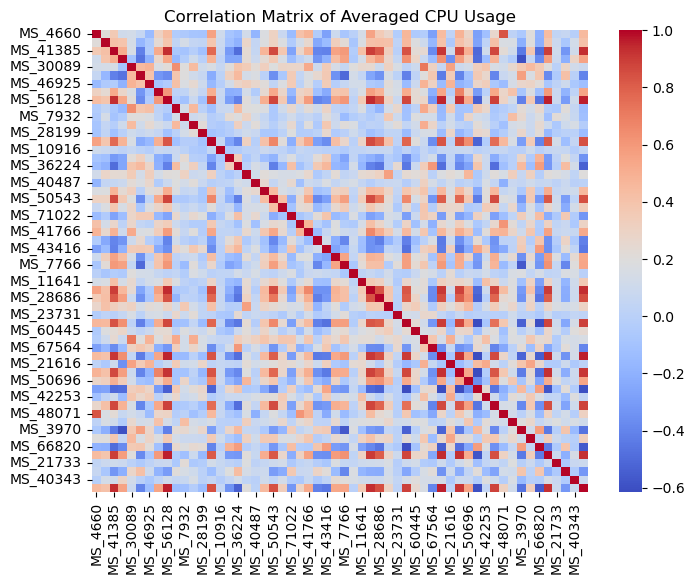

In [108]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy

# Define your list of microservices
ms_list1 = ['MS_4660', 'MS_46825', 'MS_55085', 'UNKNOWN', 'MS_37691', 'MS_2827', 'MS_69502', 'MS_8234', 'MS_60349', 'USER', 'MS_41385', 'MS_42255', 'MS_654', 'MS_14728', 'MS_2192', 'MS_4354', 'MS_30089', 'MS_72494', 'MS_5867', 'MS_44845', 'MS_46925', 'MS_1278', 'MS_27421', 'MS_4679', 'MS_55244', 'MS_56128', 'MS_23205', 'MS_11363', 'MS_39175', 'MS_2835', 'MS_13441', 'MS_53745', 'MS_7932', 'MS_28617', 'MS_28199', 'MS_35973', 'MS_29680', 'MS_10916', 'UNAVAILABLE', 'MS_23890', 'MS_36224', 'MS_37326', 'MS_21883', 'MS_8344', 'MS_40487', 'MS_37240', 'MS_16099', 'MS_57793', 'MS_50543', 'MS_59888', 'MS_6045', 'MS_14304', 'MS_6786', 'MS_59052', 'MS_268', 'MS_71022', 'MS_28728', 'MS_70183', 'MS_24213', 'MS_35194', 'MS_41766', 'MS_37374', 'MS_66988', 'MS_43416', 'MS_20829', 'MS_36345', 'MS_22184', 'MS_16801', 'MS_15171', 'MS_46708', 'MS_64525', 'MS_21000', 'MS_18306', 'MS_7766', 'MS_32139', 'MS_11641', 'MS_49059', 'MS_42352', 'MS_30655', 'MS_36126', 'MS_67220', 'MS_1556', 'MS_28686', 'MS_23608']
ms_list2 = ['MS_23731', 'MS_14304', 'MS_53701', 'MS_16143', 'UNKNOWN', 'MS_29635', 'USER', 'MS_41385', 'MS_37691', 'MS_21883', 'MS_2827', 'MS_53850', 'MS_22845', 'MS_60035', 'MS_46825', 'MS_16477', 'MS_60445', 'MS_37711', 'MS_67564', 'MS_55339', 'MS_58269', 'MS_36144', 'MS_25648', 'MS_52845', 'MS_27421', 'MS_58845', 'MS_71181', 'MS_41914', 'MS_43110', 'MS_47325', 'MS_54016', 'MS_39027', 'MS_72770', 'MS_22314', 'MS_35973', 'MS_21616', 'MS_19064', 'MS_31140', 'MS_34756', 'MS_36574', 'MS_50696', 'MS_28190', 'MS_42253', 'UNAVAILABLE', 'MS_5867', 'MS_13071', 'MS_57945', 'MS_48071', 'MS_8234', 'MS_795', 'MS_58940', 'MS_1278', 'MS_23098', 'MS_14728', 'MS_6659', 'MS_61521', 'MS_11363', 'MS_45285', 'MS_11794', 'MS_45573', 'MS_32139', 'MS_16099', 'MS_3970', 'MS_24460', 'MS_56128', 'MS_31667', 'MS_9815', 'MS_50632', 'MS_66820', 'MS_15314', 'MS_7932', 'MS_28617', 'MS_46378', 'MS_15934', 'MS_23205', 'MS_63642', 'MS_27239', 'MS_21733', 'MS_61034', 'MS_11998', 'MS_21528', 'MS_67982', 'MS_40343', 'MS_26669']
ms_lists = [ms_list1, ms_list2]
# Check which microservices in ms_list are in the cpu_timeseries DataFrame
for ind, ms_list in enumerate(ms_lists):
    available_ms = [ms for ms in ms_list if ms in cpu_timeseries.index.get_level_values('msname')]
    ms_lists[ind] = deepcopy(available_ms)

# Create a colormap object based on the size of ms_list
colors = cm.viridis(np.linspace(0, 1, len(ms_lists)))

# Initialize a DataFrame to store averaged normalized CPU usage for each microservice
combined_normalized_avg_data = pd.DataFrame(index=cpu_timeseries.columns)

# Plot the CPU usage over time for each microservice (averaged across instances)
plt.figure(figsize=(15, 5))  # Set the figure size as needed

for ind, ms_list in enumerate(ms_lists):
    for ms in ms_list:
        # Filter the DataFrame to only include rows for the microservice
        ms_data = cpu_timeseries.loc[cpu_timeseries.index.get_level_values('msname') == ms]
        
        # Combine instances by taking the mean, then normalize
        ms_mean = ms_data.mean(axis=0)
        ms_normalized = 100 * (ms_mean - ms_mean.min()) / (ms_mean.max() - ms_mean.min())
        combined_normalized_avg_data[ms] = ms_normalized
        
        # Plotting
        plt.plot(ms_normalized.index, ms_normalized.values, label=ms, color=colors[ind])

plt.legend(title='Microservice ID')
plt.title('Normalized Average CPU Usage Over Time for Microservices')
plt.xlabel('Time')
plt.ylabel('Normalized CPU Usage (0-100)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the correlation matrix for the averaged time series
correlation_matrix = combined_normalized_avg_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Averaged CPU Usage')
plt.show()


In [109]:
import lzma
import pickle
with lzma.open("./data/services_dict.xz","rb") as f:
    services_dict = pickle.load(f)

In [118]:
from tqdm import tqdm
cpu_known_service = {}
for service in tqdm(services_dict):
    available_ms = [ms for ms in services_dict[service] if ms in cpu_timeseries.index.get_level_values('msname')]
    if len(available_ms) > 0:
        cpu_known_service[service] = services_dict[service]

  0%|          | 18/12458815 [00:43<8353:34:59,  2.41s/it] 


KeyboardInterrupt: 

In [123]:
import random

def random_two_ms_service(cpu_timeseries, services_dict):
    combined_normalized_avg_data = pd.DataFrame(index=cpu_timeseries.columns)
    service = random.choice(list(services_dict.keys()))
    available_ms = [ms for ms in services_dict[service] if ms in cpu_timeseries.index.get_level_values('msname')]
    while len(available_ms) < 2:
        service = random.choice(list(services_dict.keys()))
        available_ms = [ms for ms in services_dict[service] if ms in cpu_timeseries.index.get_level_values('msname')]
    
    
    ms1, ms2 = random.sample(available_ms, 2)
    ms1_data = cpu_timeseries.loc[cpu_timeseries.index.get_level_values('msname') == ms1]
    ms2_data = cpu_timeseries.loc[cpu_timeseries.index.get_level_values('msname') == ms2]
    ms1_mean = ms1_data.mean(axis=0)
    ms1_normalized = 100 * (ms1_mean - ms1_mean.min()) / (ms1_mean.max() - ms1_mean.min())
    combined_normalized_avg_data[ms1] = ms1_normalized
    ms2_mean = ms2_data.mean(axis=0)
    ms2_normalized = 100 * (ms2_mean - ms2_mean.min()) / (ms2_mean.max() - ms2_mean.min())
    combined_normalized_avg_data[ms2] = ms2_normalized
    correlation_matrix = combined_normalized_avg_data.corr()
    correlation_matrix = np.array(correlation_matrix)
    return correlation_matrix[0,1]
    
corr_overlap = []
corr_not_overlap = []

for i in trange(0,500):
    corr_overlap.append(random_two_ms_service(cpu_timeseries, services_dict))

100%|██████████| 500/500 [24:08<00:00,  2.90s/it]


(array([  1.,   5.,   8.,  76.,  79.,  94.,  61., 116.,  56.,   4.]),
 array([-0.74653272, -0.57391156, -0.4012904 , -0.22866924, -0.05604808,
         0.11657308,  0.28919424,  0.4618154 ,  0.63443656,  0.80705772,
         0.97967888]),
 <BarContainer object of 10 artists>)

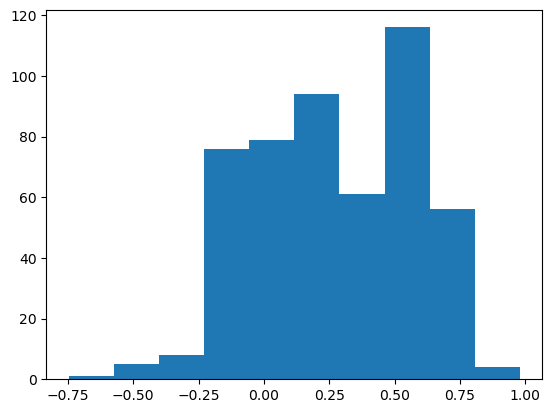

In [124]:
plt.hist(corr_overlap)

False